<a href="https://colab.research.google.com/github/divx1979/IMB_CLASSIFICATION/blob/main/Imbal_Classif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Random Oversampling

In [2]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [3]:
X, y = make_classification(n_samples= 10000, weights= [.99], flip_y= 0)

In [4]:
print(Counter(y))

Counter({0: 9900, 1: 100})


In [5]:
os = RandomOverSampler(sampling_strategy= 'minority')

In [6]:
X_o, y_o = os.fit_resample(X, y)

In [7]:
print(Counter(y_o))

Counter({0: 9900, 1: 9900})


In [8]:
#define step

In [9]:
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeL = Pipeline(steps= steps)

In [10]:
## Eval mod

In [11]:
cv1 = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state = 1)
score1 = cross_val_score(pipeL, X, y, scoring= 'f1_micro', cv = cv1, n_jobs= -1)
sc1 = np.mean(score1)

In [12]:
print(sc1)

0.9905333333333332


# UnderSample

In [13]:
## Random Undersample

In [14]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [15]:
X, y = make_classification(n_samples= 10000, weights= [0.99], flip_y= 0)

In [16]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [17]:
us1 = RandomUnderSampler(sampling_strategy = 'majority') #the sampling_strategy can also be set to 0.5 for 200 majority sample

In [18]:
X_o, y_o = us1.fit_resample(X, y)

In [19]:
print(Counter(y_o))

Counter({0: 100, 1: 100})


In [20]:
#def step

In [21]:
step1 = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipe1 = Pipeline(steps= step1)

In [22]:
#def model and cross-val-score

In [23]:
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state = 1)
score1 = cross_val_score(pipe1, X, y, scoring = 'f1_micro', cv = cv, n_jobs= -1)

In [24]:
score1 = np.mean(score1)
print(score1)

0.7745666666666668


# **OVERSAMPLE**

In [32]:
# How To Create A SMOTE Dataset Using Python
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [33]:
## Create data
X, y = make_classification(n_samples = 100, n_features = 2, n_informative= 2, n_redundant= 0, n_clusters_per_class= 1, weights= [0.9], random_state= 10)

In [34]:
##counter
counter = Counter(y)
print(counter)

Counter({0: 91, 1: 9})


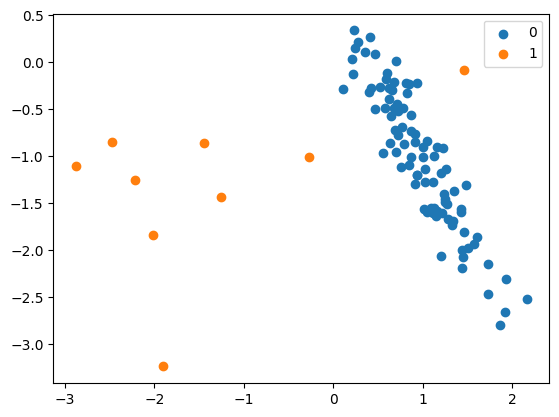

In [35]:
#viz imbal data
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

In [36]:
##SMOTE
os1 = SMOTE()
X, y = os1.fit_resample(X, y)

In [37]:
#count
counter1 = Counter(y)
print(counter1)

Counter({0: 91, 1: 91})


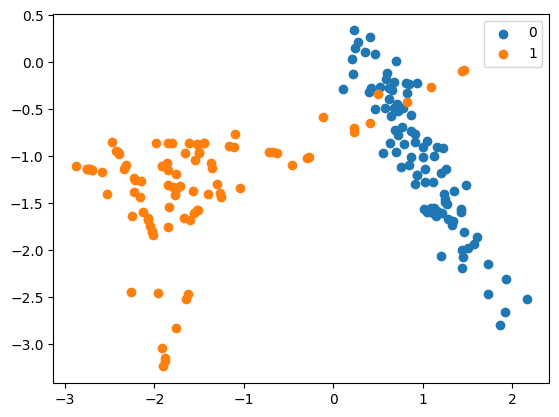

In [38]:
#viz
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

# SMOTE For Class

In [40]:
##classification

In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [42]:
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)

In [43]:
mod1 = DecisionTreeClassifier()

In [44]:
cv1 = RepeatedStratifiedKFold(n_repeats= 10, n_splits= 3, random_state = 1)
sc1 = cross_val_score(mod1, X, y, scoring = 'roc_auc', n_jobs= -1)

In [45]:
print(np.mean(sc1))

0.7675757575757576


In [47]:
# Now, we can try the same model and the same evaluation method, although use a SMOTE transformed version of the dataset.
#The correct application of oversampling during k-fold cross-validation is to apply the method to the training dataset only,
#then evaluate the model on the stratified but non-transformed test set. This can be achieved by defining a Pipeline that
#first transforms the training dataset with SMOTE

In [48]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [50]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)

In [53]:
# Pipeline
step = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipe = Pipeline(steps= step)

In [55]:
cv1 = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state = 1)
sc1 = cross_val_score(pipe, X, y, scoring = 'roc_auc', n_jobs= -1)

In [56]:
print(np.mean(sc1))

0.832121212121212


In [57]:
from imblearn.over_sampling import BorderlineSMOTE

In [58]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)

In [59]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [60]:
os1 = BorderlineSMOTE()
X, y = os1.fit_resample(X, y)

In [61]:
counter1 = Counter(y)
print(counter1)

Counter({0: 9900, 1: 9900})


In [62]:
#viz

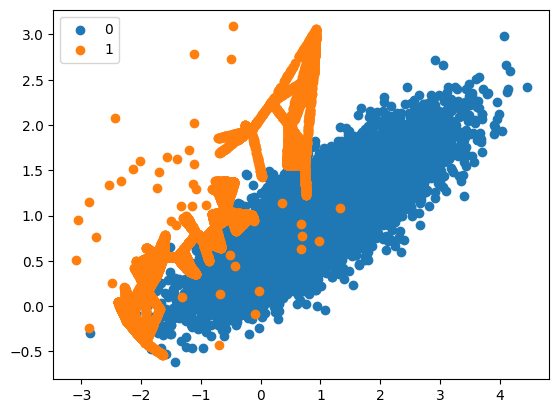

In [63]:
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

In [64]:
from imblearn.over_sampling import SVMSMOTE

In [65]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


Counter({0: 9900, 1: 9900})


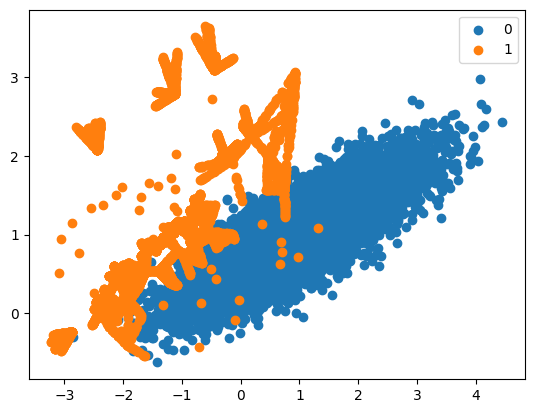

In [66]:
os1 = SVMSMOTE()
X, y = os1.fit_resample(X, y)
counter1 = Counter(y)
print(counter1)

for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

In [67]:
#ADASYN
from imblearn.over_sampling import ADASYN

In [68]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


Counter({0: 9900, 1: 9900})


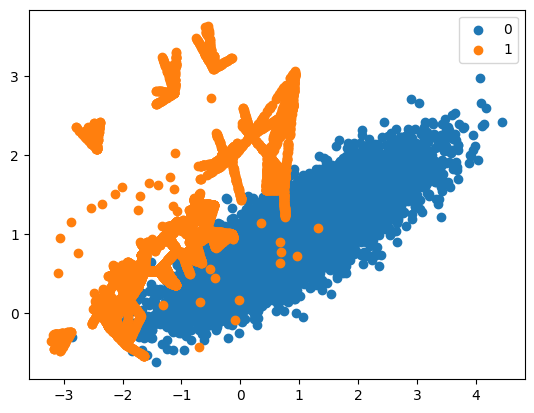

In [70]:
os1 = ADASYN()
X, y = os1.fit_resample(X, y)
counter1 = Counter(y)
print(counter1)

for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

# UnderSampling

In [71]:
from imblearn.under_sampling import NearMiss

In [72]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [73]:
#mod1

Counter({0: 100, 1: 100})


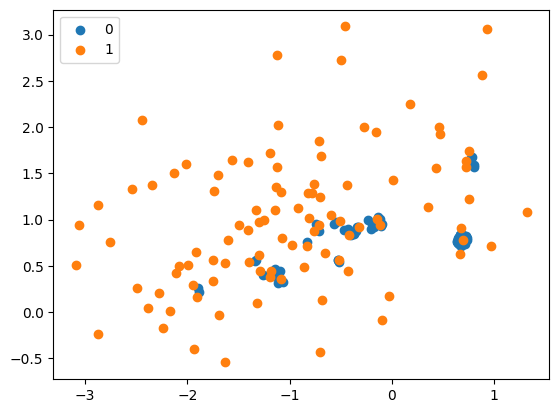

In [74]:
us1 = NearMiss(version= 1, n_neighbors= 3)
X, y = us1.fit_resample(X, y)

counter1 = Counter(y)
print(counter1)

for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()